In [ ]:
import scipy.io
import math
import random
import numpy as np
import pandas as pd

In [ ]:
All_Points = scipy.io.loadmat('AllSamples.mat') 
All_Points
arrayData=np.array(All_Points['AllSamples'])
data=pd.DataFrame(arrayData)
data.head()

,0,1
0,2.059249,7.205988
1,8.875781,8.960924
2,8.007064,2.775320
3,5.017288,3.763120
4,6.390562,5.179565


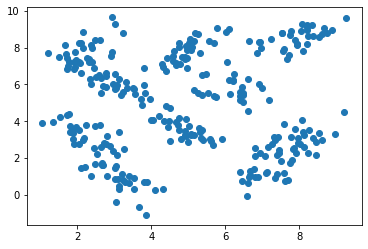

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[0],data[1])
plt.show()


In [15]:
def euclideanDist(centroidsDF,data1,calib_centroidDF,centroidSize,dataSize):
  cluster_list = []
  for i in range(dataSize):
      intial_list = []
      for j in range(centroidSize):
          intial_list.append(np.sqrt(np.square(data1.iloc[i][0] - centroidsDF.iloc[j][0]) + np.square(data1.iloc[i][1] - centroidsDF.iloc[j][1])))
      cluster_list.append(intial_list.index(min(intial_list))) # append the index of centroid from sampledf that has minimum distance from data point
  data1['cluster'] = cluster_list     # add a new column in maindf fom z_list list
  recalibrateCentroid(data1,calib_centroidDF) # call function to recalibrate the centroids coordinates
  return
  

In [16]:
def recalibrateCentroid(data1,calib_centroidDF):
  clusterCount = sorted(data1['cluster'].unique())
  for i in clusterCount:
        data2 = data1[data1['cluster']==i]  # filter the data points that belong to each cluster centroid
        calib_centroidDF.iloc[i][0] = data2[0].mean(axis=0)  # calculate the mean of all x coordinates
        calib_centroidDF.iloc[i][1] = data2[1].mean(axis=0)  # calculate the mean of all y coordinates
  return


In [17]:
def ObjectiveFunc(clusters, data1, centroidsDF):
    cost = 0
    for i in clusters:
        df = data1[data1['cluster']==i]
        fin_rows = df.shape[0]
        for j in range(fin_rows):
            cost+=(np.square(df.iloc[j][0] - centroidsDF.iloc[i][0]) + np.square(df.iloc[j][1] - centroidsDF.iloc[i][1]))
    return cost

In [21]:
cost_values = {}
for i in range(1,3):
    error = {}
    for k in range(2,11):
        count=0
        data1 = pd.DataFrame(arrayData)
        data2 = pd.DataFrame()   # dataframe to hold initialised centroids
        data3 = pd.DataFrame()   # df4 to contain recalibrated centroids every time while loop runs
        data2 = data1.sample(k)    # sample k centroid from df1 which contains 300 data points
        tot_rows = data1.shape[0]
        int_rows = data2.shape[0]
        while(data3.equals(data2) == False): # update df2 with df4 after each loop since df2 was used in euclidianfunction
            count+=1
            if count>1 :
                data2 = data3.copy()   
            else:
                data3 = data2.copy()   
            euclideanDist(data2, data1,data3,int_rows, tot_rows)  # call euclidiandistance function
        clusters = sorted(data1['cluster'].unique())   
        cost = ObjectiveFunc(clusters, data1, data2) # calcuate total cost
        error[k]=cost
    cost_values[i] = error

Objective function for k = [(2, 2498.1135603167704), (3, 1293.7774523911341), (4, 788.2693490065556), (5, 613.2824392056037), (6, 593.5140687553135), (7, 402.91835862050755), (8, 352.4503318125102), (9, 304.2433444803494), (10, 283.6598409869368)]


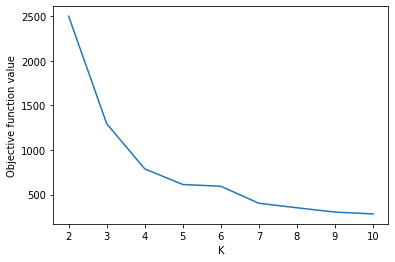

Objective function for k = [(2, 1921.0334858562057), (3, 1293.7774523911348), (4, 792.7110095863355), (5, 613.282439205604), (6, 602.912202768955), (7, 396.45651401453733), (8, 290.8573092438312), (9, 255.96788691784874), (10, 291.6051740736677)]


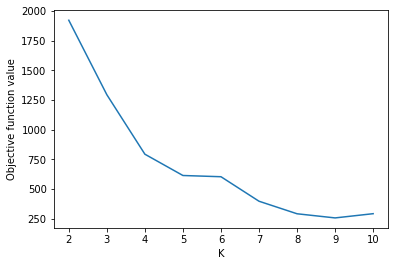

In [22]:
def objectivefunctionplot(costvalue):
    for k in costvalue:
        lists = sorted(k.items()) # sorted by key, return a list of tuples
        print("Objective function for k = {}".format(lists))
        x, y = zip(*lists) # unpack a list of pairs into two tuples
        plt.plot(x, y)
        plt.xlabel('K')
        plt.ylabel('Objective function value')
        plt.xticks(np.arange(min(x), max(x)+1, 1.0))
        plt.show()
    return
cost = cost_values.values()
objectivefunctionplot(cost)

In [25]:
def kstrategy2(l,data):
    data2 = data.sample(1)    # choose first centroid randomly from all the data points
    tot_rows = data.shape[0] 
    int_rows = data2.shape[0]
    while(l!= int_rows):  # while l not equal to number of rows in df2 which contains the centroids
        int_list = []
        tot_list = []
        for i in range(tot_rows):
            if ((data2[0]==data.iloc[i][0]) & (data2[1]==data.iloc[i][1])).any():
                continue
            else:
                for j in range(int_rows):
                    int_list.append(np.sqrt(np.square(data.iloc[i][0] - data2.iloc[j][0]) + np.square(data.iloc[i][1] - data2.iloc[j][1])))   # calculte the distance of each point from all centroids 
                value = sum(int_list)/len(int_list)  # sum up all the distances for each point
                tot_list.append(value)  
        data2.loc[int_rows] = data.iloc[tot_list.index(max(tot_list))]   # select the point with maximum average distance
        int_rows = data2.shape[0]
    return data2

In [28]:
cost_values2 = {}
for i in range(1,3):
    error2 = {}
    for k in range(2,11):
        count=0
        data1 = pd.DataFrame(arrayData) # load data into df1
        data2 = kstrategy2(k,data1) # call function to initialise centroids
        data3 = pd.DataFrame()
        tot_rows = data1.shape[0]
        int_rows = data2.shape[0]
        while(data3.equals(data2) == False):  # update df2 with df4 after each loop since df2 was used in euclidianfunction
            count+=1
            if count>1 :
                data2 = data3.copy()
            else:
                data3 = data2.copy()
            euclideanDist( data2, data1,data3,int_rows, tot_rows)  # call euclidiandistance function
        clusters = sorted(data1['cluster'].unique())
        cost = ObjectiveFunc(clusters, data1, data2)  # calcuate total cost
        error2[k]=cost
    cost_values2[i] = error2

Objective function for k = [(2, 1921.0334858562057), (3, 1294.2984174853175), (4, 1115.5344812362407), (5, 613.2824392056036), (6, 462.9263558248375), (7, 387.0819294403862), (8, 367.8712152655596), (9, 295.49275647762255), (10, 288.4909561928812)]


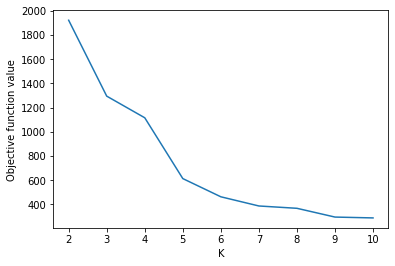

Objective function for k = [(2, 1921.0334858562057), (3, 1294.2984174853173), (4, 788.9645806635208), (5, 592.8779292654727), (6, 476.29657052696655), (7, 387.28997976092927), (8, 389.34746617094305), (9, 291.91023787500967), (10, 291.5780397299716)]


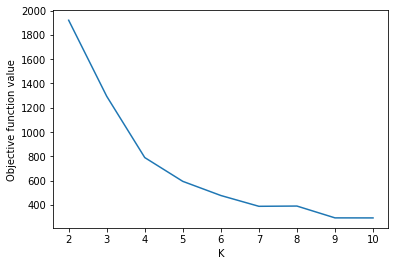

In [29]:
objectivefunctionplot(cost_values2.values())